# Exercise 1

## Problem

Using shapely and the functions that we discussed, create a map of the Gamboa-Salcedo-Benavidez-Paseo block with all the possible objects that you can include. Answer the following questions:
1. What is the perimeter of the entire block?
2. What is the total length of the streets within the block? (include the boundary streets)
3. What is the area of the perimeter block?
4. What is the distance of Herco Center from the Mosaic Tower?

![logo](aim_map.png)

## Methodology

1. Going to create five blocks using shapely's Polygon function.
2. Create streets using LineString function.
3. Create a point as a point of origin.
4. Going to scale the blocks and streets according to the map.
5. Use shapely's built-in functions to calculate perimeter, area, and distances.

## Solution

### Import Libraries

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon

### Create Blocks Polygons

In [ ]:
aim_block_ss = Polygon([[1300,445],[1255,916],[991,891],[1044,385]])
block_1_ss = Polygon([[1044,385],[1027,510],[322,363],[305,206]])
block_2_ss = Polygon([[1027,510],[1012,637],[345,530],[322,363]])
block_3_ss = Polygon([[1012,637],[1000,763],[365,682],[345,530]])
block_4_ss = Polygon([[1000,763],[991,891],[395,828],[365,682]])
full_block_ss = Polygon([[305,206],[1300,445],[1255,916],[395,828]])

### Create Streets

In [3]:
paseo_ss = LineString([[1300, 445], [1255, 916]])
benavidez_ss = LineString([[1255, 916], [991, 891], [395, 828]])
salcedo_ss = LineString([[395, 828], [365, 682], [345, 530], [322, 363], [305, 206]])
gamboa_ss = LineString([[305, 206], [1044, 385], [1300, 445]])
trasierra_ss = LineString([[991, 891], [1000, 763], [1012, 637], [1027, 510], [1044, 385]])
soria_ss = LineString([[322, 363], [1027, 510]])
aguirre_ss = LineString([[345, 530], [1012, 637]])
jimenez_ss = LineString([[365, 682], [1000, 763]])

### Point of Origin

In [4]:
origin = Point(1300,445)

### Scale the Blocks and Streets

In [5]:
# Checking the Scale Factor
actual_jiminez = 234
scale_factor = -(actual_jiminez / jimenez_ss.length)
print(jimenez_ss.length)
print(scale_factor)

640.1452960070862
-0.36554201282049203


In [6]:
import shapely

# Scaling the blocks
aim_block_map = shapely.affinity.scale(aim_block_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
block_1_map = shapely.affinity.scale(block_1_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
block_2_map = shapely.affinity.scale(block_2_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
block_3_map = shapely.affinity.scale(block_3_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
block_4_map = shapely.affinity.scale(block_4_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
full_block_map = shapely.affinity.scale(full_block_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)

# Scaling the streets
paseo_map = shapely.affinity.scale(paseo_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
benavidez_map = shapely.affinity.scale(benavidez_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
salcedo_map = shapely.affinity.scale(salcedo_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
gamboa_map = shapely.affinity.scale(gamboa_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
trasierra_map = shapely.affinity.scale(trasierra_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
soria_map = shapely.affinity.scale(soria_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
aguirre_map = shapely.affinity.scale(aguirre_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
jimenez_map = shapely.affinity.scale(jimenez_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)

### Visualise the Map

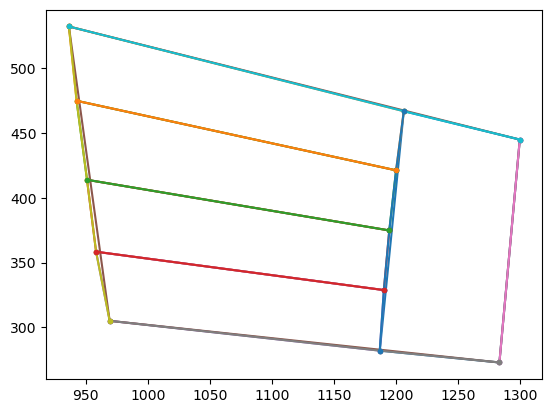

In [7]:
plt.plot(*aim_block_map.exterior.xy, marker='.')
plt.plot(*block_1_map.exterior.xy, marker='.')
plt.plot(*block_2_map.exterior.xy, marker='.')
plt.plot(*block_3_map.exterior.xy, marker='.')
plt.plot(*block_4_map.exterior.xy, marker='.')
plt.plot(*full_block_map.exterior.xy, marker='.')

plt.plot(*paseo_map.xy, marker='.')
plt.plot(*benavidez_map.xy, marker='.')
plt.plot(*salcedo_map.xy, marker='.')
plt.plot(*gamboa_map.xy, marker='.')
plt.plot(*trasierra_map.xy, marker='.')
plt.plot(*soria_map.xy, marker='.')
plt.plot(*aguirre_map.xy, marker='.')
plt.plot(*jimenez_map.xy, marker='.')

### Answers to Questions

In [8]:
# Establish a connection to our sample database "map.sqlite"
conn = sqlite3.connect('map.sqlite')
conn.enable_load_extension(True)
conn.load_extension('mod_spatialite')

#### 1. Perimeter of the entire block

In [9]:
df_perimeter = pd.read_sql('''
            SELECT ST_Perimeter(ST_GeomFromText(?)) as perimeter
            ''',conn, params=[full_block_map.wkt])

df_perimeter

,perimeter
0,1092.756573


In [10]:
df_perimeter.perimeter = df_perimeter.perimeter.round(2)
df_perimeter

,perimeter
0,1092.76


In [11]:
print("Perimeter of the full block in map units:", df_perimeter['perimeter'][0])

Perimeter of the full block in map units: 1092.76


#### 2. Total length of the streets within the block

In [12]:
# Creating the SQL query to calculate street lengths

streets_wkt = '''
WITH geoms(name, wkt) AS (
    VALUES
        ('Paseo', ?),
        ('Benavidez', ?),
        ('Salcedo', ?),
        ('Gamboa', ?),
        ('Trasierra', ?),
        ('Soria', ?),
        ('Aguirre', ?),
        ('Jimenez', ?)
)
SELECT
    name,
    ST_Length(ST_GeomFromText(wkt)) AS length_in_m
FROM geoms;
'''

In [13]:
df_street_lengths = pd.read_sql(
    streets_wkt,
    conn,
    params=[
        paseo_map.wkt,
        benavidez_map.wkt,
        salcedo_map.wkt,
        gamboa_map.wkt,
        trasierra_map.wkt,
        soria_map.wkt,
        aguirre_map.wkt,
        jimenez_map.wkt
    ]
)

In [14]:
df_street_lengths

,name,length_in_m
0,Paseo,172.954302
1,Benavidez,316.011625
2,Salcedo,229.872763
3,Gamboa,374.061665
4,Trasierra,186.031501
5,Soria,263.249643
6,Aguirre,246.933844
7,Jimenez,234.000000


In [15]:
total_length = pd.DataFrame([{
    'name': 'Total Length',
    'length_in_m': df_street_lengths['length_in_m'].sum()
}])

df_street_lengths = pd.concat([df_street_lengths, total_length], ignore_index=True)

In [16]:
df_street_lengths.length_in_m = df_street_lengths.length_in_m.round(2)
df_street_lengths

,name,length_in_m
0,Paseo,172.95
1,Benavidez,316.01
2,Salcedo,229.87
3,Gamboa,374.06
4,Trasierra,186.03
5,Soria,263.25
6,Aguirre,246.93
7,Jimenez,234.00
8,Total Length,2023.12


In [17]:
print("Total Length of all the streets in meters:", df_street_lengths['length_in_m'][8])

Total Length of all the streets in meters: 2023.12


#### 3. Area of the perimeter block

In [18]:
perimeter_area = pd.read_sql('''
        SELECT ST_Area(ST_GeomFromText(?)) as area_in_sqm
        ''', conn, params = [full_block_map.wkt])

perimeter_area

,area_in_sqm
0,67238.06865


In [19]:
perimeter_area.area_in_sqm = perimeter_area.area_in_sqm.round(2)
perimeter_area

,area_in_sqm
0,67238.07


In [ ]:
print("Area of the perimeter block in square meters:", perimeter_area['area_in_sqm'][0])

Area of the perimeter block in square meters: 67238.07


#### 4. Distance of Herco Center from the Mosaic Tower

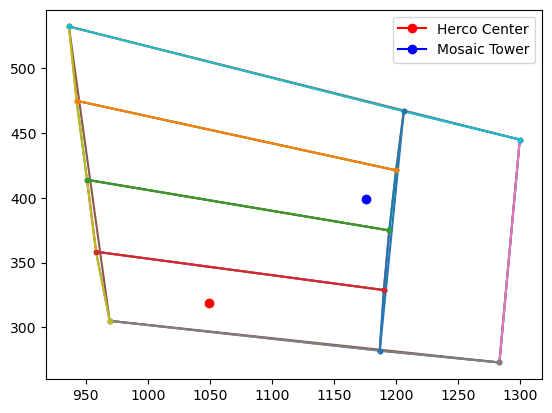

In [21]:
# Plot Points of Herco Center and Mosaic Tower from Screenshot
herco_center_ss = Point(615, 790)
mosaic_tower_ss = Point(960, 570)

# Scale the points positions with the same scale factor from origin
herco_center_map = shapely.affinity.scale(herco_center_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)
mosaic_tower_map = shapely.affinity.scale(mosaic_tower_ss, xfact=-scale_factor, yfact=scale_factor, origin=origin)

# Visualise in the map to verify
plt.plot(*aim_block_map.exterior.xy, marker='.')
plt.plot(*block_1_map.exterior.xy, marker='.')
plt.plot(*block_2_map.exterior.xy, marker='.')
plt.plot(*block_3_map.exterior.xy, marker='.')
plt.plot(*block_4_map.exterior.xy, marker='.')
plt.plot(*full_block_map.exterior.xy, marker='.')

plt.plot(*paseo_map.xy, marker='.')
plt.plot(*benavidez_map.xy, marker='.')
plt.plot(*salcedo_map.xy, marker='.')
plt.plot(*gamboa_map.xy, marker='.')
plt.plot(*trasierra_map.xy, marker='.')
plt.plot(*soria_map.xy, marker='.')
plt.plot(*aguirre_map.xy, marker='.')
plt.plot(*jimenez_map.xy, marker='.')

plt.plot(*herco_center_map.xy, marker='o', color='red', label='Herco Center')
plt.plot(*mosaic_tower_map.xy, marker='o', color='blue', label='Mosaic Tower')
plt.legend()

In [22]:
herco_mosaic_distance = pd.read_sql('''
                                    SELECT ST_Distance(ST_GeomFromText(?), ST_GeomFromText(?)) as distance_in_m
                                    ''', conn, params = [herco_center_map.wkt, mosaic_tower_map.wkt])
herco_mosaic_distance

,distance_in_m
0,149.571019


In [23]:
herco_mosaic_distance.distance_in_m = herco_mosaic_distance.distance_in_m.round(2)
herco_mosaic_distance

,distance_in_m
0,149.57


In [24]:
print("Distance between Herco Center and Mosaic Tower in meters:", herco_mosaic_distance['distance_in_m'][0])

Distance between Herco Center and Mosaic Tower in meters: 149.57
